# Execute the code below

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

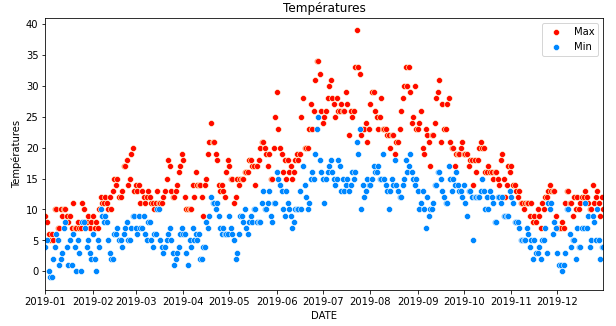


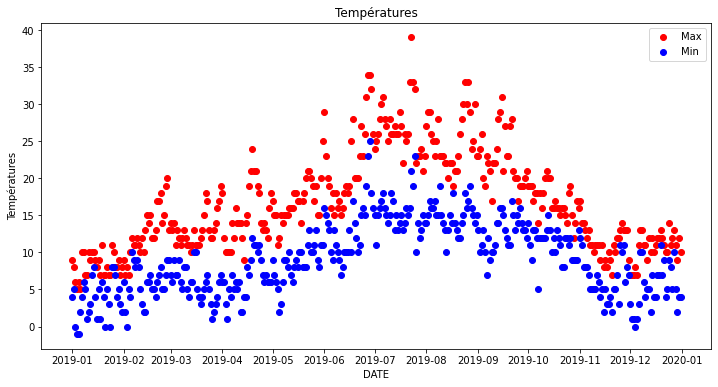

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

import matplotlib.dates as mdates
plt.subplots(figsize = (12,6))

plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='red')
plt.scatter(df_weather['DATE'], df_weather['MIN_TEMPERATURE_C'], color='blue')

plt.ylabel("Températures")
plt.xlabel("DATE")
plt.title("Températures")

# to show all 12 month in x axis. There is also "interval". It is the interval between each iteration. For example, if interval=2, mark every second occurrence.
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

lgd = plt.legend;
lgd({'Min', 'Max'})

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

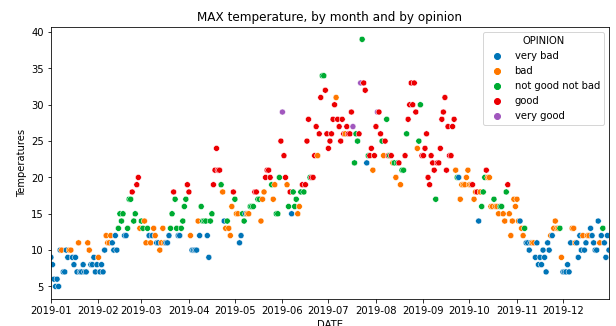

Text(0.5, 1.0, 'MAX temperature, by month and by opinion')

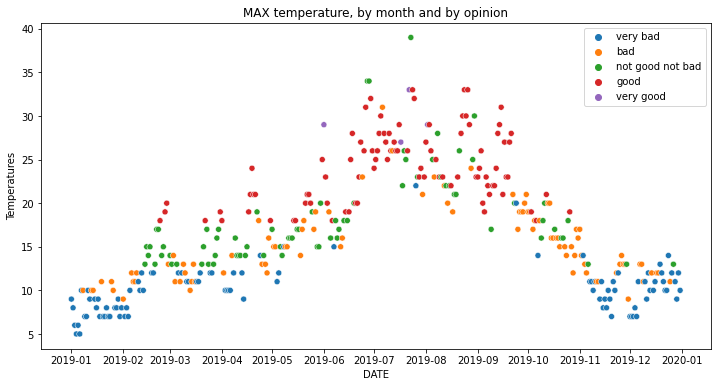

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

plt.subplots(figsize = (12,6))
sns.scatterplot(data= df_weather, x= 'DATE', y='MAX_TEMPERATURE_C', hue= 'OPINION')
plt.legend(loc='upper right')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.ylabel("Temperatures")
plt.xlabel("DATE")
plt.title("MAX temperature, by month and by opinion")

## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

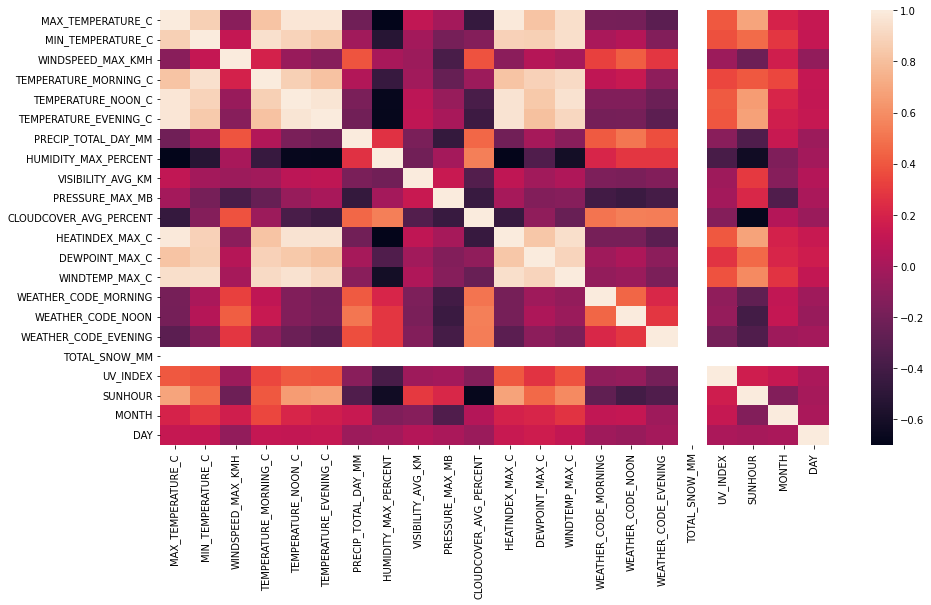

In [ ]:
# It's your turn now :

cor_matrix = df_weather.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor_matrix, annot=False)

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

In [ ]:
# It's your turn:

data = df_weather.loc[:, 'DATE': 'HUMIDITY_MAX_PERCENT']
slice10 = pd.concat([data, df_weather['OPINION']], axis=1)
slice10

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,OPINION
0,2019-01-01,9,4,10,4,7,8,0.2,94,very bad
1,2019-01-02,8,5,18,7,7,5,0.0,90,very bad
2,2019-01-03,6,0,18,0,4,3,0.0,88,very bad
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,very bad
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,very bad
...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,not good not bad
361,2019-12-28,11,5,12,7,8,8,0.0,93,very bad
362,2019-12-29,9,2,11,3,6,7,0.0,86,very bad
363,2019-12-30,12,4,7,5,9,9,0.0,61,very bad


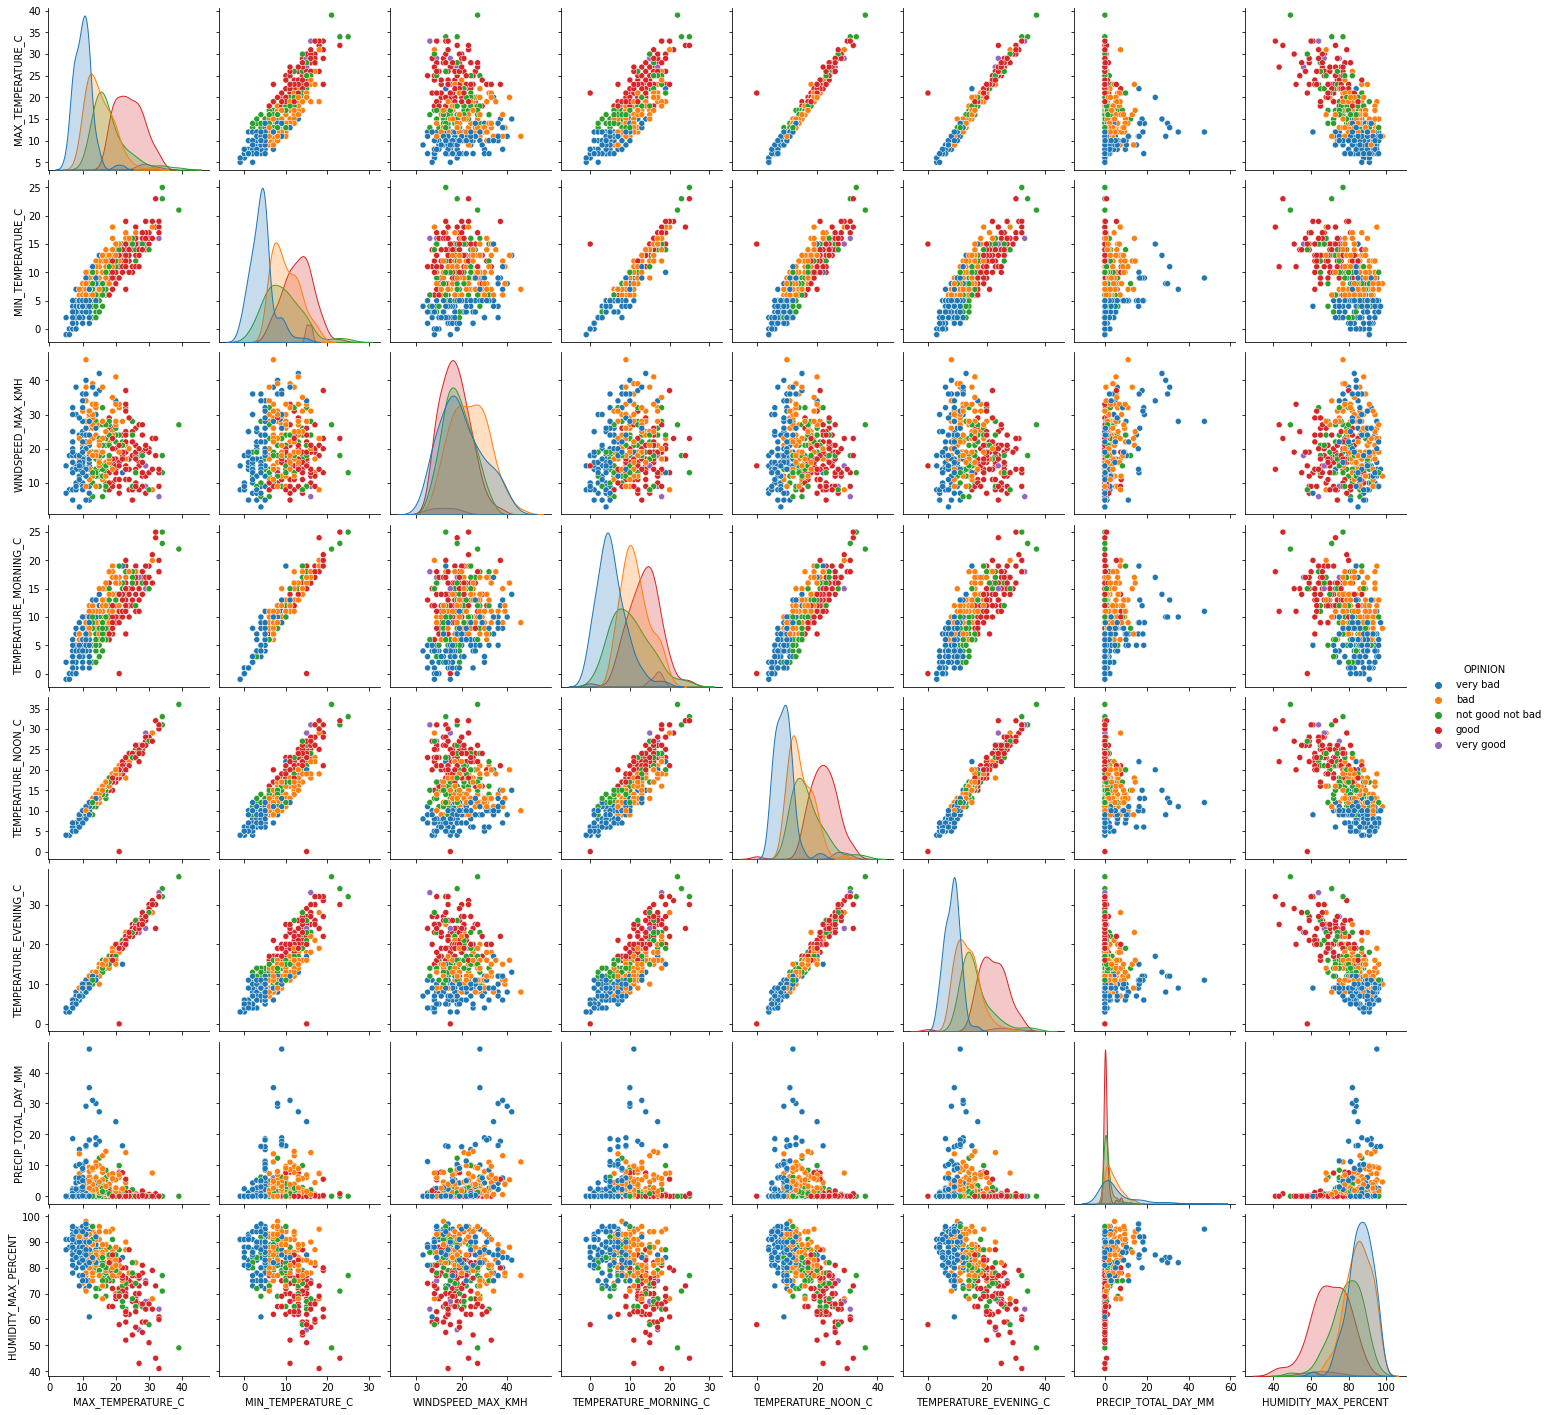

In [ ]:
sns.pairplot(slice10, hue='OPINION')

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


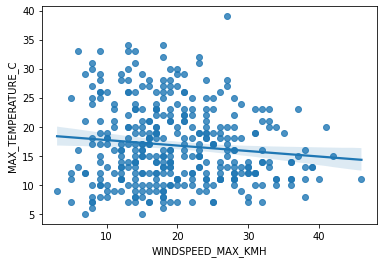

In [ ]:

sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()


In [ ]:
df_weather1 = df_weather.loc[(df_weather['DATE'].dt.month==12) | (df_weather['DATE'].dt.month==1) | (df_weather['DATE'].dt.month==2)]
df_weather1

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,-2,143,116,116,0,1,8.7,very bad,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,8,119,143,116,0,1,8.7,not good not bad,12,27
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,4,143,116,116,0,1,6.9,very bad,12,28
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,0,116,116,116,0,1,8.7,very bad,12,29
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,4,113,113,113,0,1,8.7,very bad,12,30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


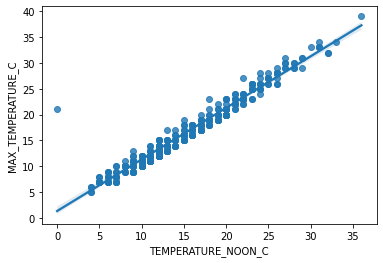

In [ ]:
# Display a regplot with a positive correlation:

sns.regplot('TEMPERATURE_NOON_C', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


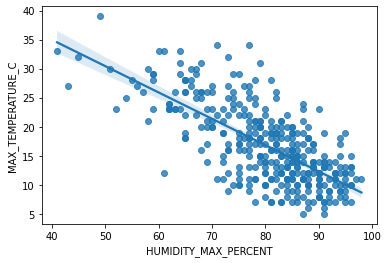

In [ ]:
# Display a regplot with a negative correlation:

sns.regplot('HUMIDITY_MAX_PERCENT', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

# More and more...
Draw 4 different charts of your choice on the same dashboard. You're an analyst, you have to be force of proposal. Your goal here is to represent which season has the best weather.

Remember, a MatPlotLib "figure" is like a dashboard including subplots. So you have to create a MatPlotLib figure with subplots. And these subplots will be Seaborn's charts.

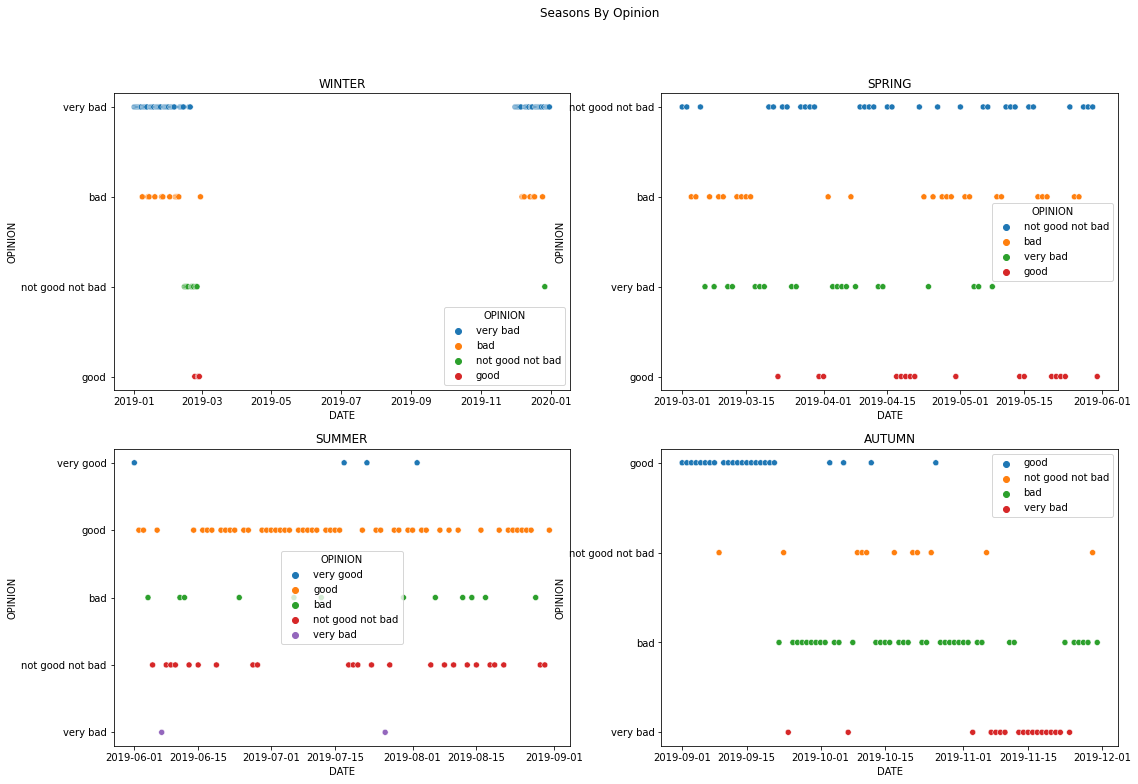

In [ ]:
# Your code here

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Seasons By Opinion')

# Season Winter
df_weather1 = df_weather.loc[(df_weather['DATE'].dt.month==12) | (df_weather['DATE'].dt.month==1) | (df_weather['DATE'].dt.month==2)]
sns.scatterplot(ax=axes[0, 0], data= df_weather1, x= 'DATE', y='OPINION', hue ='OPINION')
plt.legend(loc='best')
plt.xlabel("DATE")
axes[0,0].set_title('WINTER')


# Season Spring
df_weather2 = df_weather.loc[(df_weather['DATE'].dt.month==3) | (df_weather['DATE'].dt.month==4) | (df_weather['DATE'].dt.month==5)]
sns.scatterplot(ax=axes[0, 1], data= df_weather2, x= 'DATE', y='OPINION', hue='OPINION')
plt.legend(loc='best')
plt.xlabel("DATE")
axes[0,1].set_title("SPRING")


# Season Summer
df_weather3 = df_weather.loc[(df_weather['DATE'].dt.month==6) | (df_weather['DATE'].dt.month==7) | (df_weather['DATE'].dt.month==8)]
sns.scatterplot(ax=axes[1, 0], data= df_weather3, x= 'DATE', y='OPINION', hue='OPINION')
plt.legend(loc='best')
plt.xlabel("DATE")
axes[1,0].set_title("SUMMER")


# Season Autumn
df_weather4 = df_weather.loc[(df_weather['DATE'].dt.month==9) | (df_weather['DATE'].dt.month==10) | (df_weather['DATE'].dt.month==11)]
sns.scatterplot(ax=axes[1, 1], data= df_weather4, x= 'DATE', y='OPINION', hue='OPINION')
plt.legend(loc='best')
plt.xlabel("DATE")
axes[1,1].set_title("AUTUMN")


plt.show()

# Is it summer? It seems appropriate. :) 